In [1]:
# Load required libraries
library(readr)
library(ggplot2)

In [2]:
# Read data from CSV file
data <- read_csv(
  "series.csv",
  show_col_types = FALSE)

# Extract x_values and y_values
x_values <- data$xs
y_values <- data$ys2

In [3]:
# Curve Fitting Order
order <- 2

# Perform quadratic regression using lm()
lm_model <- lm(y_values ~
  poly(x_values, order, raw = TRUE))

# Coefficients
coefficients <- coef(lm_model)

# Reverse order to match output
coefficients <- coefficients[
  length(coefficients):1]

# Print coefficients
cat("Coefficients (a, b, c):\n\t",
  coefficients, "\n")

Coefficients (a, b, c):
	 3 4 5 


In [4]:
# Generate values for the quadratic curve
x_plot <- seq(
  min(x_values), max(x_values),
  length.out = 100)
y_plot <- predict(
  lm_model,
  newdata = data.frame(x_values = x_plot))

# Create data frame for ggplot2
data <- data.frame(x = x_values, y = y_values)

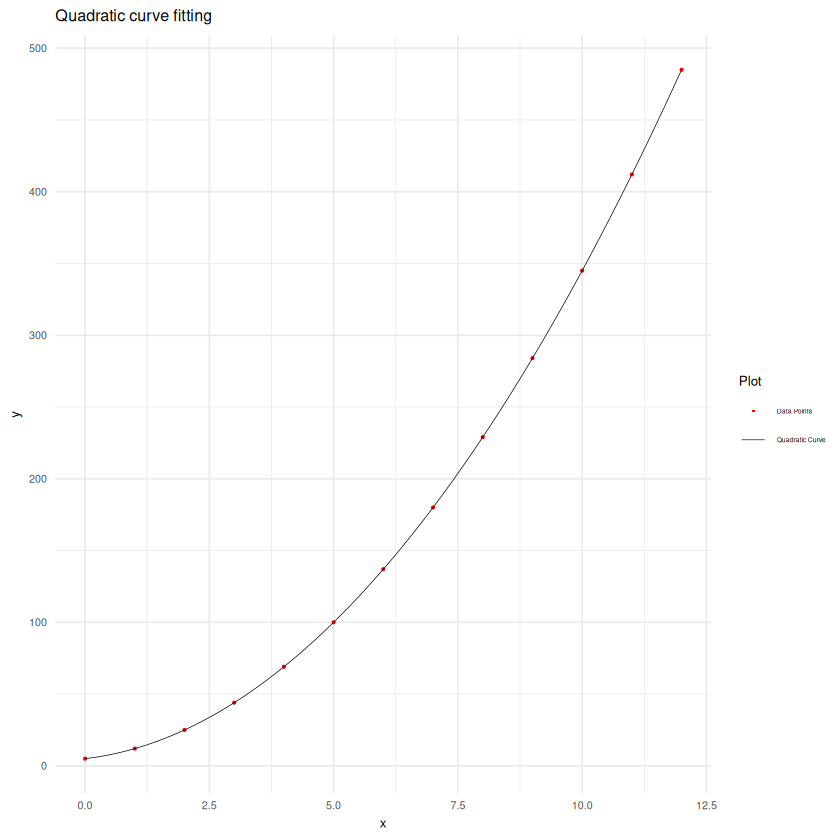

In [5]:
ggplot(data, aes(x = x, y = y)) +
  geom_point(aes(color="Data Points"), size = 0.5) +
  geom_line(
    data = data.frame(x = x_plot, y = y_plot),
    aes(x, y, color="Quadratic Curve"),
    linewidth = 0.2) +
  labs(
    x = "x", y = "y",
    title = "Quadratic curve fitting") +
  theme_minimal() +
  theme(legend.position = "right",
        legend.text = element_text(size = 4),
        text = element_text(size = 8)) +
  scale_color_manual(
    name = "Plot",
    breaks = c(
      "Data Points",
      "Quadratic Curve"),
    values = c(
      "Data Points"="red",
      "Quadratic Curve"="black")) +
  guides(
    color = guide_legend(
      override.aes = list(
        shape = c(16, NA), linetype = c(0, 1)
    )))